##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

In [2]:
import numpy as np
# from patsy import dmatrices, dmatrix, demo_data
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import model_selection, metrics
from sklearn import linear_model as lin

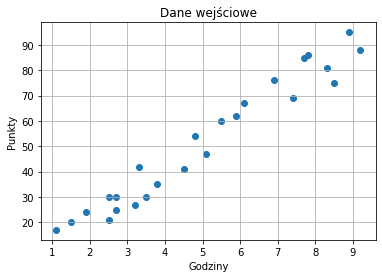

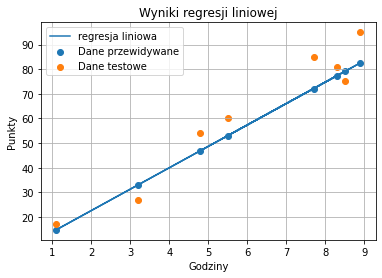

Średni błąd bezwzględny:
 6.922026946774553 

Błąd średniokwadratowy:
 61.273884864605265 

Pierwiastek błędu średniokwadratowego:
 7.827763720540195 

Współczynnik funckji liniowej (coef_) dla kolejnych zmiennych zależnych:
 8.697572563284094 

Miejce przecięcia z osią y (intercept_) dla kolejnych zmiennych zależnych :
 5.165874842253714


In [45]:
scores_df = pd.read_csv(f"SCORES.csv",delimiter=',')

Hours = scores_df['Hours'].to_numpy().reshape(-1, 1)
Scores = scores_df['Scores'].to_numpy().reshape(-1, 1)

plt.scatter(Hours,Scores)
plt.title("Dane wejściowe")
plt.xlabel("Godziny")
plt.ylabel("Punkty")
plt.grid()
plt.show()
plt.show()

X_train, X_test, y_train, y_test = model_selection.train_test_split(Hours,Scores,test_size= 0.3,train_size=0.3)

reg = lin.LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)


error_meansquere = metrics.mean_squared_error(y_pred,y_test)
error_meanabsolute = metrics.mean_absolute_error(y_pred,y_test)


plt.scatter(X_test, y_pred, label = 'Dane przewidywane')
plt.scatter(X_test,y_test,label = 'Dane testowe')
plt.plot(X_test,y_pred,label = 'regresja liniowa')
plt.xlabel("Godziny")
plt.ylabel("Punkty")
plt.title("Wyniki regresji liniowej")
plt.legend()
plt.grid()
plt.show()

print("Średni błąd bezwzględny:\n", error_meanabsolute,"\n\nBłąd średniokwadratowy:\n",error_meansquere,"\n\nPierwiastek błędu średniokwadratowego:\n", np.sqrt(error_meansquere),"\n")


coef = reg.coef_
print("Współczynnik funckji liniowej (coef_) dla kolejnych zmiennych zależnych:\n",coef[0][0],'\n')
inter = reg.intercept_
print("Miejce przecięcia z osią y (intercept_) dla kolejnych zmiennych zależnych :\n",inter[0])


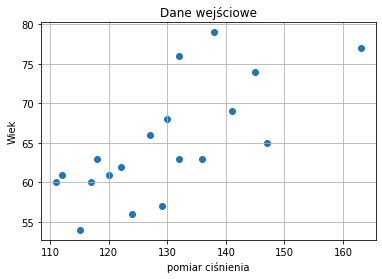

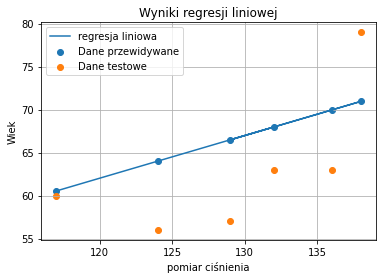

Średni błąd bezwzględny:
 6.33062330623306 

Błąd średniokwadratowy:
 48.67543569744635 

Pierwiastek błędu średniokwadratowego:
 6.97677831792342 

Współczynnik funckji liniowej (coef_) dla kolejnych zmiennych zależnych:
 0.4959349593495935 

Miejce przecięcia z osią y (intercept_) dla kolejnych zmiennych zależnych :
 2.50406504065041


In [54]:
SBP_df = pd.read_csv(f"SBP.csv",delimiter=',')
Age = SBP_df['Age'].to_numpy().reshape(-1, 1)
SBP = SBP_df['SBP'].to_numpy().reshape(-1, 1)

plt.scatter(SBP,Age)
plt.title("Dane wejściowe")
plt.ylabel("Wiek")
plt.xlabel("pomiar ciśnienia")
plt.grid()
plt.show()
plt.show()

X_train, X_test, y_train, y_test = model_selection.train_test_split(SBP,Age,test_size= 0.3,train_size=0.3)

reg = lin.LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

plt.scatter(X_test, y_pred, label = 'Dane przewidywane')
plt.scatter(X_test,y_test,label = 'Dane testowe')
plt.plot(X_test,y_pred,label = 'regresja liniowa')
plt.ylabel("Wiek")
plt.xlabel("pomiar ciśnienia")
plt.title("Wyniki regresji liniowej")
plt.legend()
plt.grid()
plt.show()

error_meansquere = metrics.mean_squared_error(y_pred,y_test)
error_meanabsolute = metrics.mean_absolute_error(y_pred,y_test)


print("Średni błąd bezwzględny:\n", error_meanabsolute,"\n\nBłąd średniokwadratowy:\n",error_meansquere,"\n\nPierwiastek błędu średniokwadratowego:\n", np.sqrt(error_meansquere),"\n")
coef = reg.coef_
print("Współczynnik funckji liniowej (coef_) dla kolejnych zmiennych zależnych:\n",coef[0][0],'\n')
inter = reg.intercept_
print("Miejce przecięcia z osią y (intercept_) dla kolejnych zmiennych zależnych :\n",inter[0])

****
**Wnioski:**

Regresja zwraca możliwe najlepszą funkcję liniową opisującą zależność między wartościami
i argumentami zbioru punktów. Metody *coef_* oraz *intercept_* pozwalają na wyznaczenia parametrów tej funckji.
Dla danych z zadania 1 wyniki układały się w uporządkowany sposób, zależność liniowa była widoczna już na wykresie
przzedstawiającym zbiór danych, stąd małe wartości błędów.

****

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

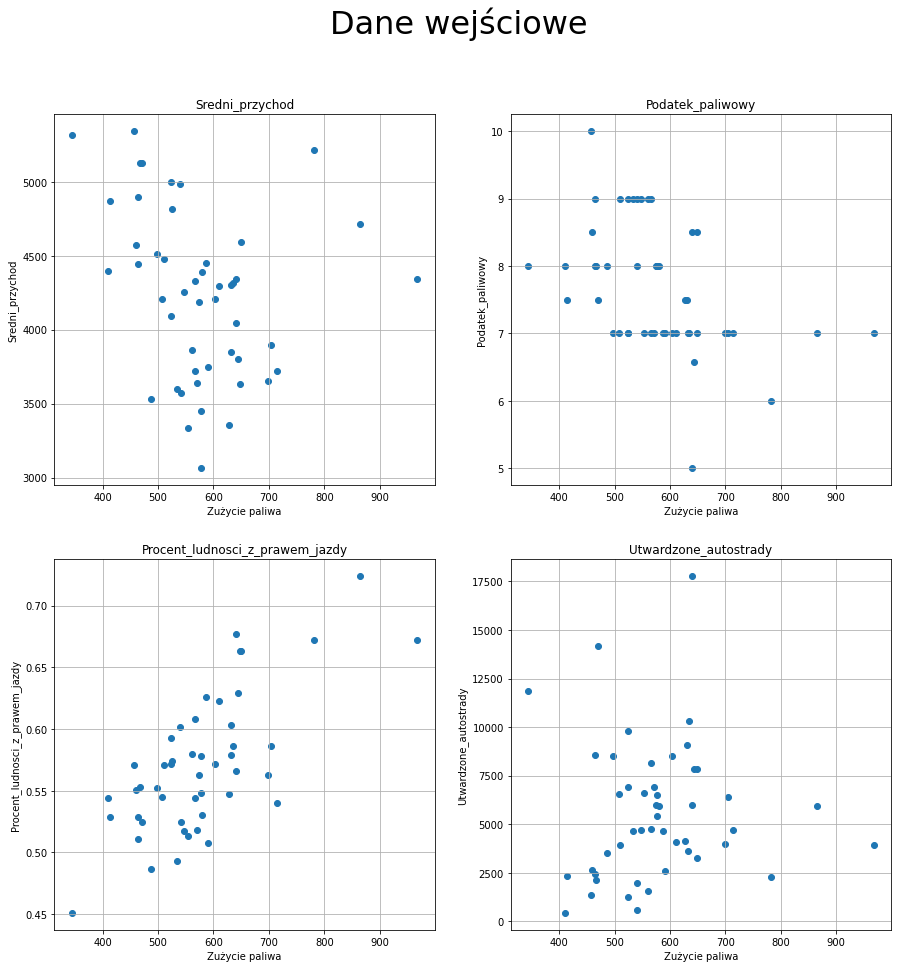

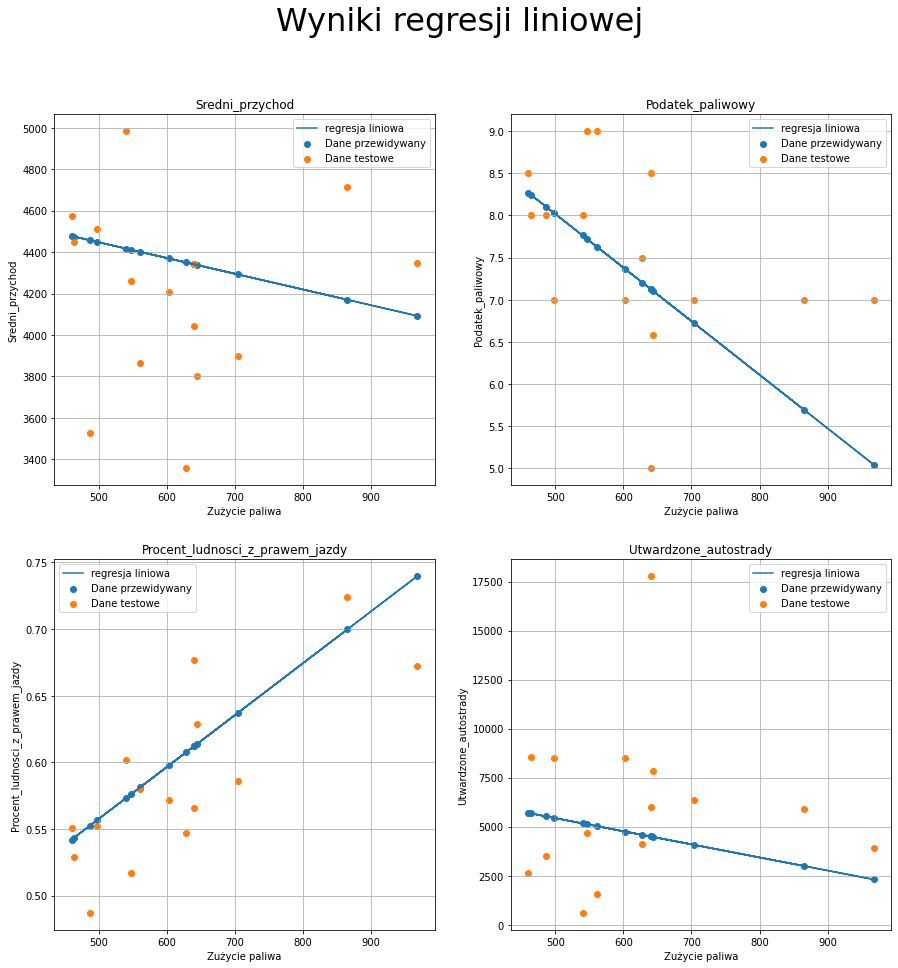

Średni błąd bezwzględny:
 904.6186161672313 

Błąd średniokwadratowy:
 4806658.551508141 

Pierwiastek błędu średniokwadratowego:
 2192.409302914978 



Współczynnik funckji liniowej (coef_) dla kolejnych zmiennych zależnych:

Podatek_paliwowy :   -0.006363067853723374 

Sredni_przychod :   -0.7591790506575375 

Utwardzone_autostrady :   -6.6798970013242425 

Procent_ludnosci_z_prawem_jazdy :   0.0003893908389997199 



Miejce przecięcia z osią y (intercept_)  dla kolejnych zmiennych zależnych:

Podatek_paliwowy :   11.199335233923804 

Sredni_przychod :   4826.794610661205 

Utwardzone_autostrady :   8776.009813292181 

Procent_ludnosci_z_prawem_jazdy :   0.362917980241239 



In [47]:
petrol_df = pd.read_csv(f"PETROL.csv",delimiter=',')

Podatek = petrol_df['Zuzycie_paliwa'].to_numpy()
Variables = petrol_df[['Podatek_paliwowy','Sredni_przychod','Utwardzone_autostrady','Procent_ludnosci_z_prawem_jazdy']]
Variables_np = Variables.to_numpy()
reshaped_podatek = Podatek.reshape(-1,1)
X_train, X_test, y_train, y_test = model_selection.train_test_split(reshaped_podatek,Variables_np,test_size= 0.3,train_size=0.3)

fig, axs = plt.subplots(2,Variables_np.shape[1]//2,figsize = (15,15))
fig.suptitle('Dane wejściowe', fontsize = 32)
Test_plotable = X_test.reshape(1,-1)
for i in range(Variables_np.shape[1]):
    data = Variables_np[:,i]
    if i %2 == 0:
        axs[i//2][1].scatter(Podatek,data)
        axs[i//2][1].set_title(Variables.columns[i])
        axs[i//2][1].set_xlabel("Zużycie paliwa")
        axs[i//2][1].set_ylabel(Variables.columns[i])
        axs[i//2][1].grid()
    else:
        axs[(i-1)//2][0].scatter(Podatek,data)
        axs[(i-1)//2][0].set_title(Variables.columns[i])
        axs[(i-1)//2][0].set_xlabel("Zużycie paliwa")
        axs[(i-1)//2][0].set_ylabel(Variables.columns[i])
        axs[(i-1)//2][0].grid()
plt.show()

reg = lin.LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

fig, axs = plt.subplots(2,Variables_np.shape[1]//2,figsize = (15,15))
fig.suptitle('Wyniki regresji liniowej', fontsize = 32)
for i in range(Variables_np.shape[1]):
    pred_data = y_pred[:,i]
    test_data = y_test[:,i]
    if i %2 == 0:
        axs[i//2][1].scatter(Test_plotable,pred_data, label = 'Dane przewidywany')
        axs[i//2][1].scatter(Test_plotable,test_data, label = 'Dane testowe')
        axs[i//2][1].plot(Test_plotable[0],pred_data, label = 'regresja liniowa')
        axs[i//2][1].set_title(Variables.columns[i])
        axs[i//2][1].set_xlabel("Zużycie paliwa")
        axs[i//2][1].set_ylabel(Variables.columns[i])
        axs[i//2][1].legend()
        axs[i//2][1].grid()
    else:
        axs[(i-1)//2][0].scatter(Test_plotable,pred_data, label = 'Dane przewidywany')
        axs[(i-1)//2][0].scatter(Test_plotable,test_data, label = 'Dane testowe')
        axs[(i-1)//2][0].plot(Test_plotable[0],pred_data, label = 'regresja liniowa')
        axs[(i-1)//2][0].set_title(Variables.columns[i])
        axs[(i-1)//2][0].set_xlabel("Zużycie paliwa")
        axs[(i-1)//2][0].set_ylabel(Variables.columns[i])
        axs[(i-1)//2][0].legend()
        axs[(i-1)//2][0].grid()

plt.show()

error_meansquere = metrics.mean_squared_error(y_pred,y_test)
error_meanabsolute = metrics.mean_absolute_error(y_pred,y_test)
print("Średni błąd bezwzględny:\n", error_meanabsolute,"\n\nBłąd średniokwadratowy:\n",error_meansquere,"\n\nPierwiastek błędu średniokwadratowego:\n", np.sqrt(error_meansquere),"\n")
coef = reg.coef_
print("\n\nWspółczynnik funckji liniowej (coef_) dla kolejnych zmiennych zależnych:\n")
for i in range(len(coef)):
    print(Variables.columns[i],':  ',coef[i][0],'\n')

inter = reg.intercept_

print("\n\nMiejce przecięcia z osią y (intercept_)  dla kolejnych zmiennych zależnych:\n")
for i in range(len(inter)):
    print(Variables.columns[i],':  ',inter[i],'\n')

****
**Wnioski:**

Regresja dla wielu zmiennych zwraca funkcję liniową najlepiej opisującą każdą
ze zmiennych niezależnych występujących w danych wejściowych. Jak widać dla czterech rzędów zmiennych
zwrócone zostały cztery wartości współczynnika prostej z metody *coef_* oraz
cztery punkty przecięcia się prostej z osią wartości przy zerowej wartości zmiennej niezależnej
z metody *inetrcept_*.

Nie wszystkie dane wejściowe tworzyły zależność, którą można opisać za pomocą funkcji liniowej
stąd wyniki regresji obarczone są dużym błędem. Znacznie większym niż ten z poprzedniego zadania dla funcji jednej zmiennej.
Problem dobrze obrazuje wynik regresji dla danej *średni przychód*.

****

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

C:\Users\SEBAST~1\AppData\Local\Temp/ipykernel_16240/3874349911.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nzal[['fbs','exang']] = Nzal[['fbs','exang']].astype('int')


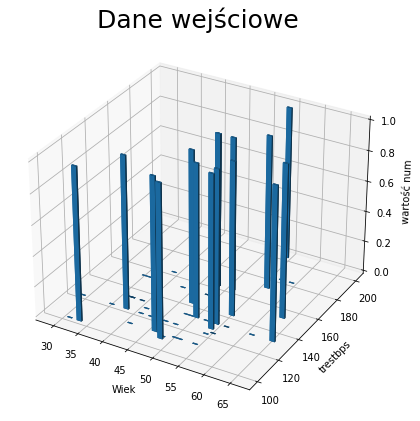

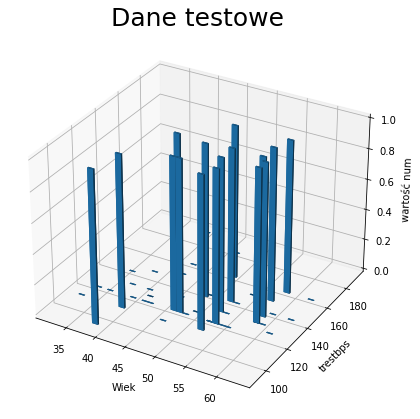

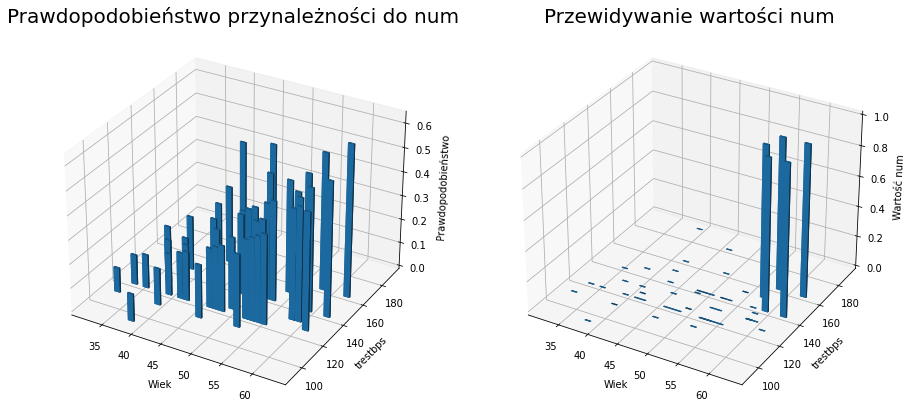

Ocena jakości regresji za pomocą metod wbudowanych w bibliotekę sklearn.metrics:

              precision    recall  f1-score   support

           0       0.71      0.92      0.80        37
           1       0.40      0.12      0.19        16

    accuracy                           0.68        53
   macro avg       0.55      0.52      0.50        53
weighted avg       0.62      0.68      0.62        53



In [76]:

heart_df = pd.read_csv(f"HEART.csv",delimiter=',',na_values='?')
heart_df = heart_df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','num       ']]
heart_df.dropna(axis=0,how='any',inplace=True)
dummiecoded = pd.get_dummies(heart_df,columns=['cp', 'restecg'])
Nzal = dummiecoded[[ 'sex','fbs','exang', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'restecg_0.0', 'restecg_1.0','restecg_2.0','num       ']]
Nzal[['fbs','exang']] = Nzal[['fbs','exang']].astype('int')
DaneWyjsciowe = Nzal.to_numpy()[:,10]
DaneWejsciowe = dummiecoded[['age','trestbps']].to_numpy()

X_train, X_test, y_train, y_test = model_selection.train_test_split(DaneWejsciowe,DaneWyjsciowe,test_size= 0.2,train_size=0.2)

reg = lin.LogisticRegression()
reg.fit(X_train,y_train)
y_prob = reg.predict_proba(X_test)
y_pred = reg.predict(X_test)

RavAge = X_test[:,0].ravel()
RavPAr = X_test[:,1].ravel()
RavAge_we = X_train[:,0].ravel()
RavPAr_we = X_train[:,1].ravel()



fig = plt.figure(figsize=(15, 15))
ax4 = fig.add_subplot(122, projection='3d')
_x = np.arange(len(RavAge_we))
_y = np.arange(len(RavPAr_we))
X, Y = np.meshgrid(_x, _y)
bottom = np.zeros_like(y_train)
width = depth = 1
ax4.bar3d(RavAge_we, RavPAr_we, bottom, width, depth, y_train, shade=True)
ax4.set_title('Dane wejściowe', fontsize = 25)
ax4.set_xlabel('Wiek')
ax4.set_ylabel('trestbps')
ax4.set_zlabel('wartość num')
plt.show()

fig = plt.figure(figsize=(15, 15))
ax3 = fig.add_subplot(121, projection='3d')

_x = np.arange(len(RavAge))
_y = np.arange(len(RavPAr))
X, Y = np.meshgrid(_x, _y)
bottom = np.zeros_like(y_test)
width = depth = 1
ax3.bar3d(RavAge, RavPAr, bottom, width, depth, y_test, shade=True)
ax3.set_title('Dane testowe', fontsize = 25)
ax3.set_xlabel('Wiek')
ax3.set_ylabel('trestbps')
ax3.set_zlabel('wartość num')
plt.show()

fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
_x = np.arange(len(RavAge))
_y = np.arange(len(RavPAr))
X, Y = np.meshgrid(_x, _y)
bottom = np.zeros_like(y_prob[:,1])
width = depth = 1

ax1.bar3d(RavAge, RavPAr, bottom, width, depth, y_prob[:,1], shade=True)
ax1.set_title('Prawdopodobieństwo przynależności do num',fontsize = 20)
ax1.set_xlabel('Wiek')
ax1.set_ylabel('trestbps')
ax1.set_zlabel('Prawdopodobieństwo')

ax2.bar3d(RavAge, RavPAr, bottom, width, depth, y_pred, shade=True)
ax2.set_title('Przewidywanie wartości num',fontsize = 20)
ax2.set_xlabel('Wiek')
ax2.set_ylabel('trestbps')
ax2.set_zlabel('Wartość num')

plt.show()

print("Ocena jakości regresji za pomocą metod wbudowanych w bibliotekę sklearn.metrics:\n")
print(metrics.classification_report(y_test,y_pred))

****
**Wnioski:**

W celu zwizualizowania zasady działania funkcji *LogisticRegression()*
wykorzystałem tylko dwie zmienne niezależne. Dla wyższych wymiarów problemu funkcja działa analogicznie
ale ciężko jest przedstawić wyniki w czytelnej formie.

Jak widać w miejscach gdzie w danych treningowych na pewnym obszarze występuje więcej wartości
0 niż 1 to przewidywane dla tego miejsca prawdopodobieństwo jest niskie.
Funkcja predict zwraca wartość 1 dla przynależności do danej grupy (w zaprezentowanym przykładzie do parametru num).
W miejscach gdzie przewidywane przez funkcję wartość rozwiązania wynosiła 1,
wykres prawdopodobieństwa w danym punkcie przkraczał 0,5. Zobrazowane jest to na parze wykresów
o tytułach:

*Prawdopodobieństwo wystąpienia num* - wyniki metody *predict_proba*

*Przewidywanie wystąpienia
num* - wyniki metody *predict*

Liczba prób treningowych jest stosunkowo mała co jest powodem małej skuteczności przewidywania wyników.

****